In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Importing Data

In [131]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
stock_data = pd.read_csv(url)
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [132]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [133]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"], format="%Y-%m-%d")

In [134]:
stock_data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [135]:
stock_data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [136]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [137]:
sns.set_style('darkgrid')

## Trend of Closing Prices for all the dates

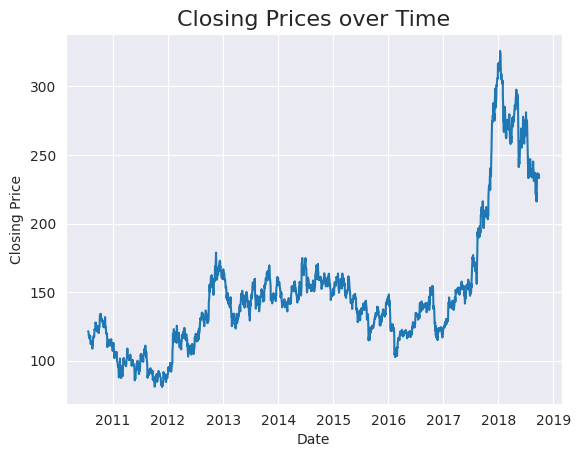

In [138]:
sns.lineplot(x='Date', y='Close', data=stock_data)
plt.title('Closing Prices over Time', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

## Correlation of all variables

<ipython-input-139-83f1efcdff30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = stock_data.corr()


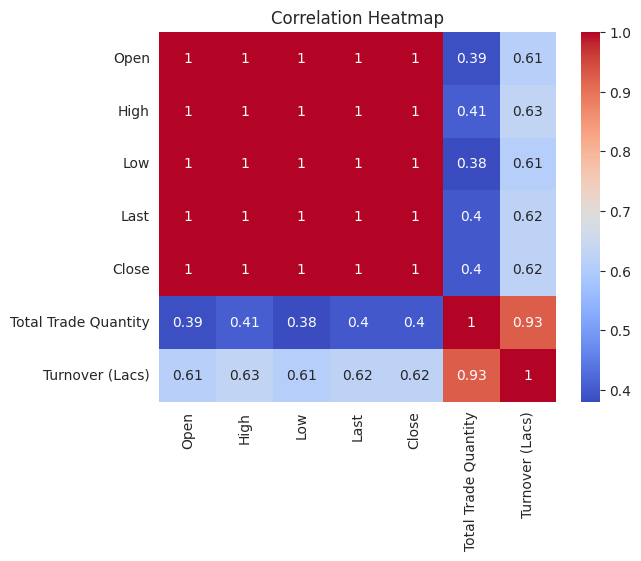

In [139]:
corr = stock_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Analyzing Outliers

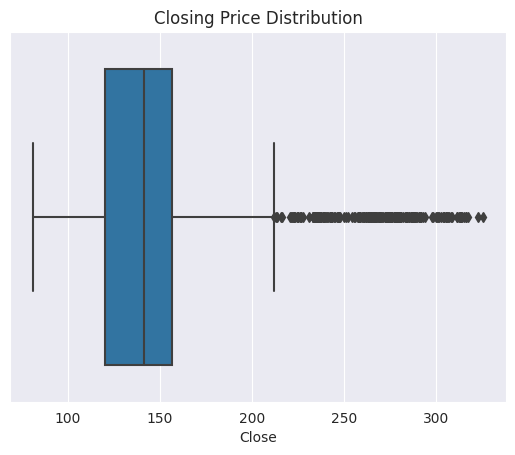

In [141]:
sns.boxplot(x="Close", data=stock_data)
plt.title('Closing Price Distribution')
plt.show()

In [142]:
z_scores = (stock_data['Close'] - stock_data['Close'].mean()) / stock_data['Close'].std()

# Identify the outliers using a threshold of +/-3 z-scores
outliers = stock_data.loc[abs(z_scores) > 3]

# View the outliers
print(outliers.head())

          Date    Open    High     Low    Last   Close  Total Trade Quantity  \
104 2018-04-30  293.90  298.50  292.05  297.85  297.55               3046154   
164 2018-01-30  300.95  307.30  299.45  304.00  304.00               2590100   
165 2018-01-29  305.25  306.80  300.70  301.30  301.80               1806919   
166 2018-01-25  304.00  311.25  301.65  305.30  304.25               3631793   
167 2018-01-24  306.00  310.70  302.80  303.70  304.25               2154759   

     Turnover (Lacs)  
104          9025.87  
164          7871.40  
165          5489.77  
166         11123.41  
167          6585.37  


### Only taking Closing Price For Prediction

In [143]:
stock_close_price = stock_data.reset_index()["Close"]

In [144]:
stock_close_price.shape

(2035,)

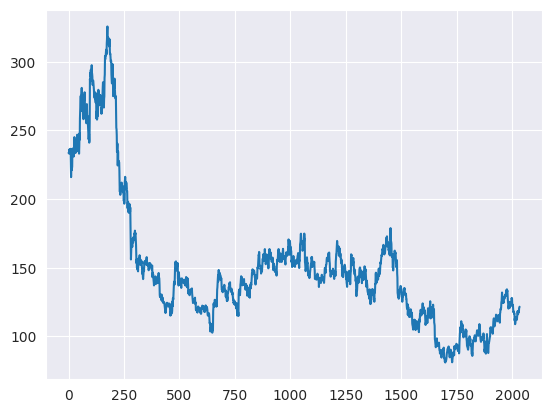

In [145]:
plt.plot(stock_close_price)
plt.show()

## Scaling the Data

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [147]:
stock_close_price

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [148]:
stock_close_price = scaler.fit_transform(np.array(stock_close_price).reshape(-1,1))

In [149]:
stock_close_price

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

## Train Test Split

In [150]:
training_size = int(len(stock_close_price)*0.75)
test_size = len(stock_close_price)- training_size
train_data, test_data = stock_close_price[0:training_size, :], stock_close_price[training_size:len(stock_close_price), :]

In [151]:
train_data.shape, test_data.shape

((1526, 1), (509, 1))

## Data Preprocessing

In [179]:
def create_dataset(dataset, timestep = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)- timestep - 1):
        dataX.append(dataset[i:(i+timestep), 0])
        dataY.append(dataset[i+timestep, 0])
    return np.array(dataX), np.array(dataY)

In [203]:
timestep = 200
X_train , y_train = create_dataset(train_data, timestep)
X_test, y_test = create_dataset(test_data, timestep)

In [204]:
X_train.shape, y_train.shape

((1325, 200), (1325,))

In [205]:
X_test.shape, y_test.shape

((308, 200), (308,))

In [206]:
# Reshaping the input to 3D for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

## Creating LSTM Model

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [208]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(200,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [209]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 200, 50)           10400     
                                                                 
 lstm_16 (LSTM)              (None, 200, 50)           20200     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [242]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 31ms/step - loss: 1.7442e-04 - val_loss: 1.6224e-04
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 2.0533e-04 - val_loss: 1.3931e-04
Epoch 3/100
21/21 [==============================] - 0s 22ms/step - loss: 1.7282e-04 - val_loss: 1.5301e-04
Epoch 4/100
21/21 [==============================] - 0s 22ms/step - loss: 1.8364e-04 - val_loss: 1.4181e-04
Epoch 5/100
21/21 [==============================] - 0s 22ms/step - loss: 1.7012e-04 - val_loss: 2.0482e-04
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss: 1.7816e-04 - val_loss: 1.2655e-04
Epoch 7/100
21/21 [==============================] - 0s 22ms/step - loss: 1.8806e-04 - val_loss: 1.8244e-04
Epoch 8/100
21/21 [==============================] - 0s 22ms/step - loss: 1.9705e-04 - val_loss: 1.4142e-04
Epoch 9/100
21/21 [==============================] - 1s 27ms/step - loss: 1.9879e-04 - val_loss: 1.3392e-04
Epoch 10/100
21/21 [========

##Making Predictions

In [244]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

10/10 [==============================] - 0s 8ms/step


In [245]:
# Reverse Scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [246]:
from sklearn.metrics import mean_squared_error

In [247]:
math.sqrt(mean_squared_error(y_train, train_predict))

150.38761403239147

In [248]:
math.sqrt(mean_squared_error(y_test, test_predict))

107.47507866902116

##Plotting The Prediction

In [249]:
timestep = 200
train_plot = np.empty_like(stock_close_price)
test_plot = np.empty_like(stock_close_price)
train_plot[:,:]=np.nan
test_plot[:,:]=np.nan

In [250]:
train_plot[timestep:len(train_predict)+timestep, :] = train_predict
test_plot[len(train_predict)+(timestep*2)+1 : len(stock_close_price)-1, :] = test_predict

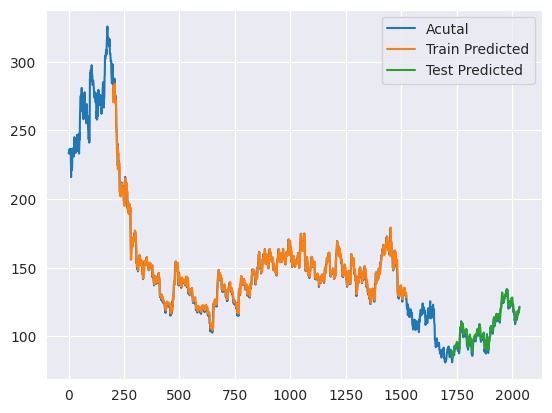

In [251]:
plt.plot(scaler.inverse_transform(stock_close_price), label="Acutal")
plt.plot(train_plot, label="Train Predicted")
plt.plot(test_plot, label="Test Predicted")
plt.legend()
plt.show()

In [252]:
len(test_data)

509

In [253]:
x_input = test_data[309:].reshape(1,-1)
x_input.shape

(1, 200)

In [254]:
input = list(x_input)
input = input[0].tolist()
input

[0.06781045751633985,
 0.06290849673202609,
 0.06924019607843135,
 0.07557189542483661,
 0.0778186274509804,
 0.08088235294117646,
 0.0884395424836601,
 0.09395424836601307,
 0.09599673202614378,
 0.08660130718954251,
 0.09027777777777773,
 0.08517156862745096,
 0.08374183006535946,
 0.07945261437908496,
 0.09109477124183002,
 0.09129901960784309,
 0.08803104575163395,
 0.09681372549019607,
 0.11417483660130717,
 0.10498366013071897,
 0.09987745098039214,
 0.08537581699346403,
 0.08047385620915032,
 0.06862745098039214,
 0.06576797385620914,
 0.061478758169934644,
 0.0716911764705882,
 0.0702614379084967,
 0.07475490196078427,
 0.06821895424836599,
 0.06924019607843135,
 0.07066993464052285,
 0.06801470588235292,
 0.0667892156862745,
 0.07414215686274506,
 0.0716911764705882,
 0.08639705882352938,
 0.08312908496732024,
 0.06311274509803921,
 0.06290849673202609,
 0.05167483660130712,
 0.031862745098039214,
 0.04003267973856206,
 0.03860294117647056,
 0.041053921568627416,
 0.0339052287

In [255]:
output = []
n_steps = 200
i = 0

while(i<200):
    if(len(input) > 200):
        x_input = np.array(input[1:])
        print("{} day input  {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i,yhat))
        input.extend(yhat[0].tolist())
        input = input[1:]
        output.extend(yhat.tolist())
        i+=1

    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        input.extend(yhat[0].tolist())
        print(len(input))
        output.extend(yhat.tolist())


Streaming output truncated to the last 5000 lines.
 0.11683007 0.11764706 0.12888072 0.12847222 0.13337418 0.14236111
 0.14093137 0.13970588 0.13827614 0.13541667 0.13010621 0.12254902
 0.12479575 0.13848039 0.14011438 0.13888889 0.13541667 0.14011438
 0.1380719  0.13071895 0.13071895 0.12867647 0.11846405 0.14644608
 0.14808007 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157
 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268 

In [256]:
output

[[0.16860456764698029],
 [0.17106018960475922],
 [0.17340122163295746],
 [0.17565543949604034],
 [0.17784641683101654],
 [0.17998848855495453],
 [0.1820896416902542],
 [0.1841541975736618],
 [0.1861845701932907],
 [0.188182070851326],
 [0.1901477426290512],
 [0.19208239018917084],
 [0.1939866989850998],
 [0.19586144387722015],
 [0.19770722091197968],
 [0.1995246261358261],
 [0.20131419599056244],
 [0.20307645201683044],
 [0.2048119455575943],
 [0.20652127265930176],
 [0.208204984664917],
 [0.20986372232437134],
 [0.21149805188179016],
 [0.2131085991859436],
 [0.21469593048095703],
 [0.216260626912117],
 [0.2178032547235489],
 [0.21932430565357208],
 [0.2208242416381836],
 [0.22230347990989685],
 [0.2237624078989029],
 [0.22520144283771515],
 [0.22662080824375153],
 [0.22802086174488068],
 [0.2294018268585205],
 [0.23076392710208893],
 [0.2321074903011322],
 [0.23343272507190704],
 [0.2347397804260254],
 [0.23602880537509918],
 [0.2373001128435135],
 [0.23855391144752502],
 [0.239790275

In [257]:
x_new = np.arange(1,201)
x_pred = np.arange(201,401)

In [258]:
len(stock_close_price)

2035

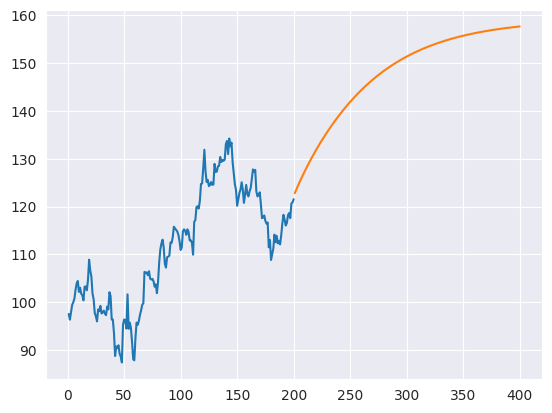

In [259]:
plt.plot(x_new,scaler.inverse_transform(stock_close_price[1835:]))
plt.plot(x_pred, scaler.inverse_transform(output[1:]))
plt.show()

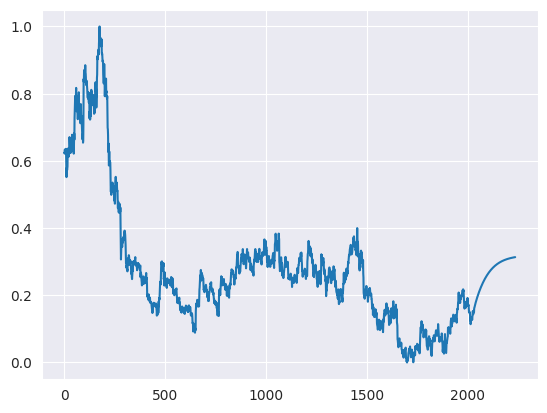

In [262]:
final_data = stock_close_price.tolist()
final_data.extend(output)
plt.plot(final_data)
plt.show()